In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline

# Dataset
Apartment Price in Victoria

# Background
The Dataset provides living area and conservation status.
There are 218 observations and 16 variables.

# Objectives
Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to determine the best model and give the reason.

Tony who has profession as a broker wants to predict apartment price in Victoria based on living
area environment and apartment conservation status. Determine the best model to predict and
redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.

# Instructions
Download the dataset as a CSV file and place it in your current working directory with the filename
"victoria.csv".
1. Import Dataset: Load the dataset.
2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)
3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.
4. Variable Selection: Choose the variable and its reason.
5. Modelling: Create models using Regression
6. Accuracy or Error: Calculate the Error using the helper function from the library, fromdataset only

## 1. Import Dataset: Load the dataset.

In [128]:
df = pd.read_csv('victoria.csv', sep = ';')
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000.0,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000.0,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000.0,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000.0,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600.0,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


Melakukan load dataset Victoria, dan melakukan display data untuk mengetahui kolom apa saja yang tersedia pada dataset victoria ini.
Beberapa kolom yang akan diolah:
1. Totalprice = menunjukkan harga
2. area = luas apartemen yang akan disewa
3. zone = jenis zona
4. category = kategory dari rumah apartemen
5. Age = umur penghuni
6. floor = Pada lantai berapa penghuni
7. Rooms = Jumlah ruangan yang ditempati penghuni
8. Toilet = Jumlah toilet pada tempat huni
9. Elevator = Adanya lift pada rumah huni

## 2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean,median, modus, max, min, range)

In [101]:
df.describe()

,row.labels,totalprice,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,109.500000,280741.523853,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,63.075352,69298.459358,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,155000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,55.250000,228500.000000,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,109.500000,269750.000000,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,163.750000,328625.000000,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,218.000000,560000.000000,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


## 3.Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.

In [102]:
numeric = df.columns[[1,2,5]]
data_numeric = df[numeric]
categorical = df.drop(columns=numeric,axis=1)
data_categorical = df.columns

<function matplotlib.pyplot.show>

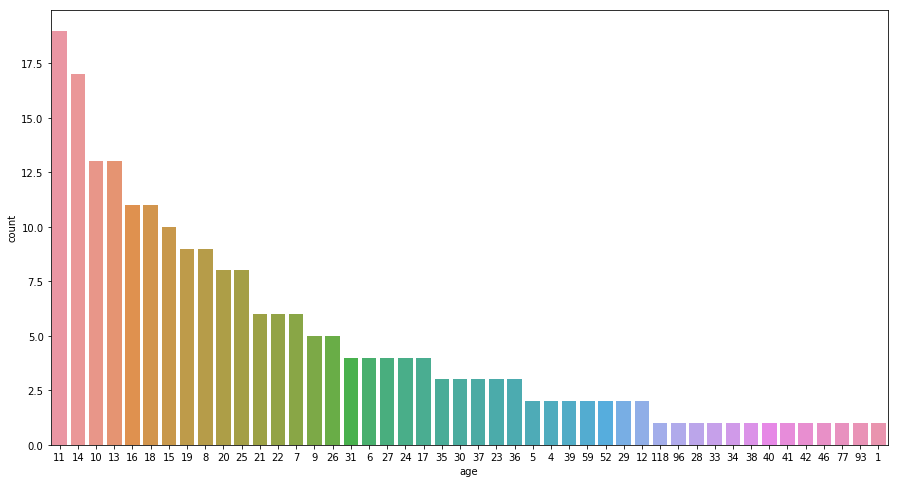

In [130]:
f=plt.figure(figsize=(15,8))
j=1
for i in numeric[[2]]:
    f.add_subplot(1,1,j)
    sns.countplot(df[i],order=df[i].value_counts().index)
    j+=1
plt.show

Distribusi umur penghuni dari apartemen. Dari data diatas, paling banyak penghuni ialah anak-anak setiap rumah huni di apartemen victoria

In [ ]:
Jumlah dari setiap kategori-kategori 

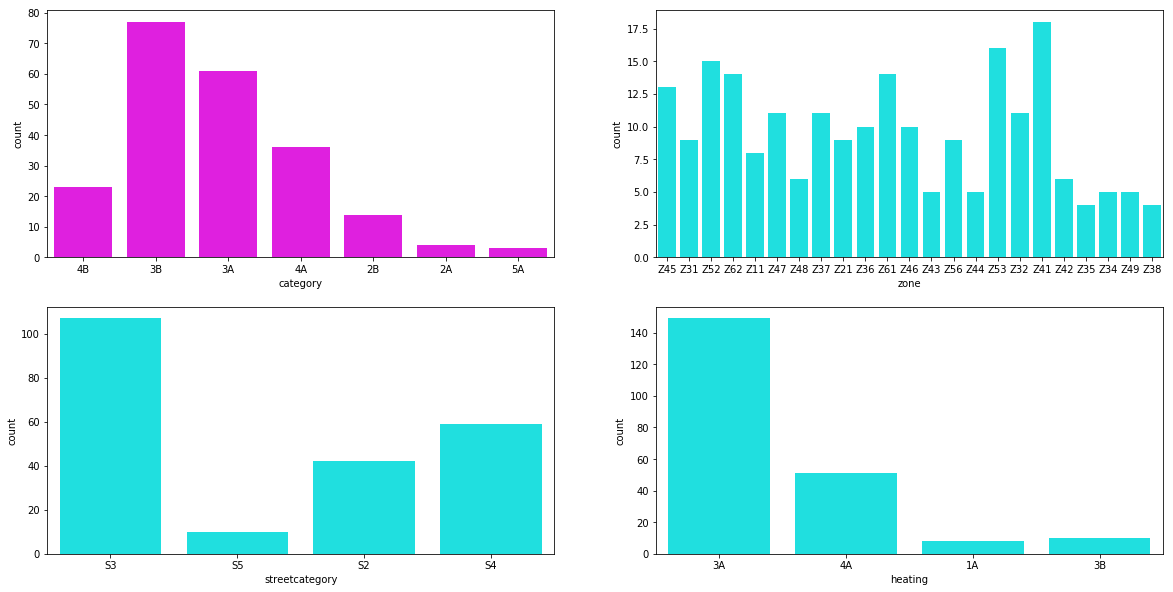

In [172]:
f = plt.figure(figsize=(20,10))

f.add_subplot(2,2,1)
sns.countplot(df['category'], color = 'magenta')

f.add_subplot(2,2,2)
sns.countplot(df['zone'], color = 'cyan')

f.add_subplot(2,2,3)
sns.countplot(df['streetcategory'], color = 'cyan')

f.add_subplot(2,2,4)
sns.countplot(df['heating'], color = 'cyan')

## Jumlah terbanyak antara Rooms, toiltes, dan garage

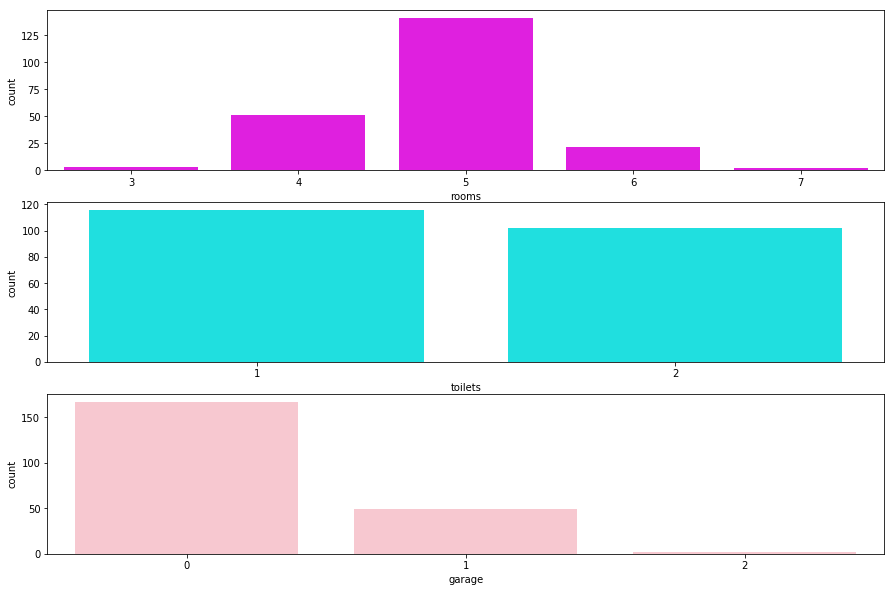

In [143]:
f = plt.figure(figsize=(15,10))

f.add_subplot(3,1,1)
sns.countplot(df['rooms'], color = 'magenta')

f.add_subplot(3,1,2)
sns.countplot(df['toilets'], color = 'cyan')

f.add_subplot(3,1,3)
sns.countplot(df['garage'], color = 'pink')
plt.show()

### Kesimpulan
Pada data diatas kita dapat simpulkan bahwa:
1. Setiap rumah huni apartemen, Paling banyak memiliki 5 ruangan
2. Setiap rumah huni hanya memiliki 1 atau 2 toilet dengan 1 toilet memiliki sedikit lebih banyak daripada yang memiliki 2 toilet
3. Setiap rumah hini kebanyakan tidak memiliki garasi di apartemen.<br>

Sehingga dari rumah huni apartemen yang paling banyak ialah terdiri dari 5 ruangan, 1 buah toilet, dan tidak memiliki garasi

## Perbandingan antara harga rumah huni apartemen terhadap category apartemen dan rooms

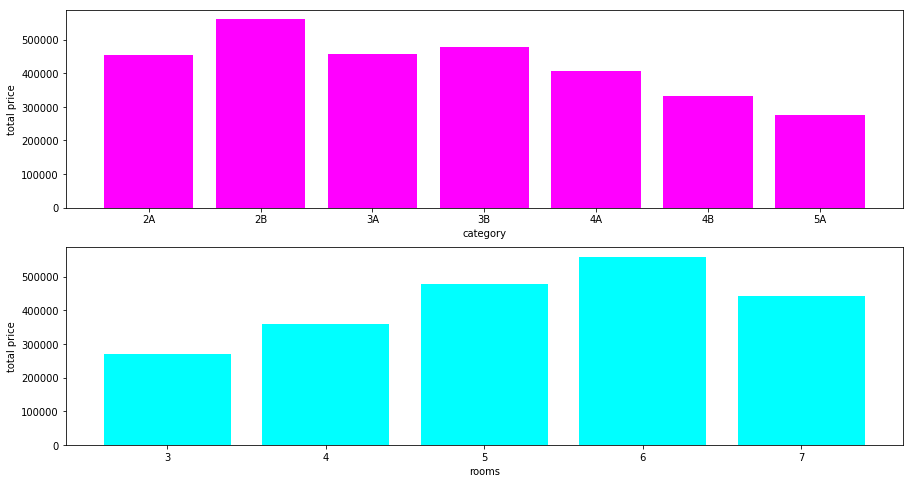

In [167]:
f = plt.figure(figsize=(15,8))

f.add_subplot(2,1,1)
plt.bar(df['category'], df['totalprice'], color = 'magenta')
plt.xlabel('category')
plt.ylabel('total price')
plt.title('')

f.add_subplot(2,1,2)
plt.bar(df['rooms'], df['totalprice'], color = 'cyan')
plt.xlabel('rooms')
plt.ylabel('total price')
plt.title('')
plt.show()

Text(0.5,1,'')

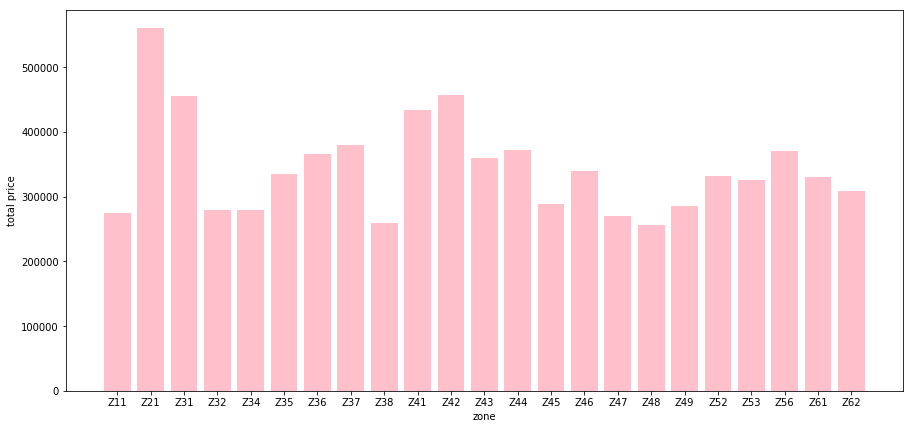

In [169]:
f = plt.figure(figsize=(15,7))

plt.bar(df['zone'], df['totalprice'],color = 'pink')
plt.xlabel('zone')
plt.ylabel('total price')
plt.title('')

### Kesimpulan:
Pada category berbanding harga, kategori 3B, merupakan rata-rata category rumah huni yg paling mahal dan kategori 5A merupakan category rumah paling rumah rata-rata.<br>
sedangkan semakin banyak ruangan cenderung semakin mahal harga rumah huni apartemen. Tetapi pada jumlah ruangan 7, cenderung lebih murah dibanding ruangan 6. <br>
Zone juga termasuk dalam salah satu pertimbangan dalam harga dimana Z31 merupakan zona yang paling mahal, dan Z48 merupakan harga yang paling murah
ketiga variabel ini dapat mempengaruhi harga dari suatu hunian apartemen

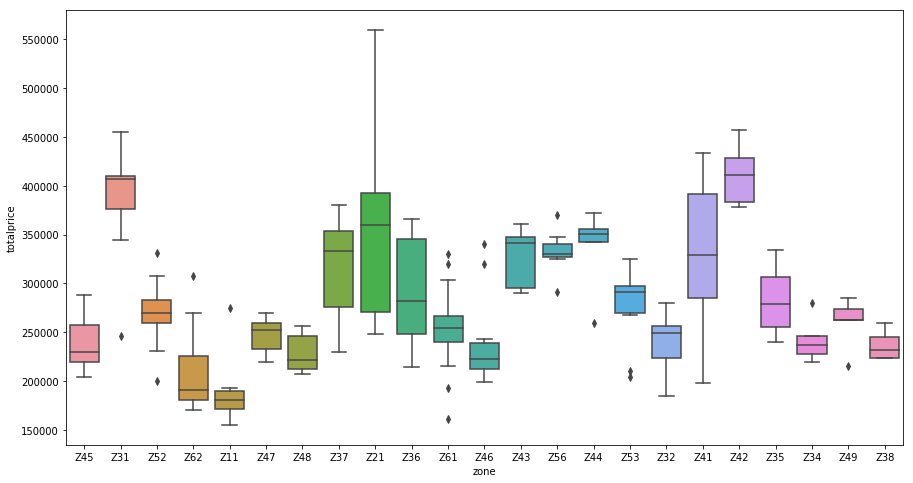

In [159]:
plt.figure(figsize=(15,8))
sns.boxplot(x="zone", y="totalprice", data=df)
plt.show()

## Perbandingan persebaran data antara umur dan harga rumah huni apartemen

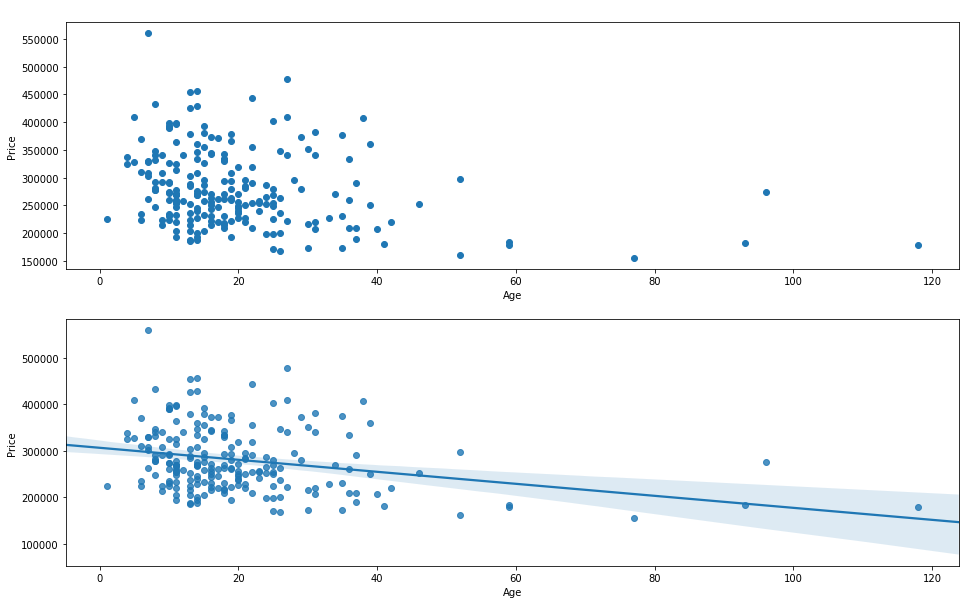

In [178]:
f = plt.figure(figsize=(16, 10))

f.add_subplot(2,1,1)
plt.scatter(df['age'],df['totalprice'])
plt.title(' ')
plt.xlabel('Age')
plt.ylabel('Price')

f.add_subplot(2,1,2)
sns.regplot(x = 'age', y = 'totalprice', data = df)
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

### Kesimpulan
Kesimpulan dari persebaran diatas ialah rata-rata rumah hunian ialah kisaran 200.000 hingga 300.000 pada rentang umur penghuni 15-25

## Korelasi Antar Variabel

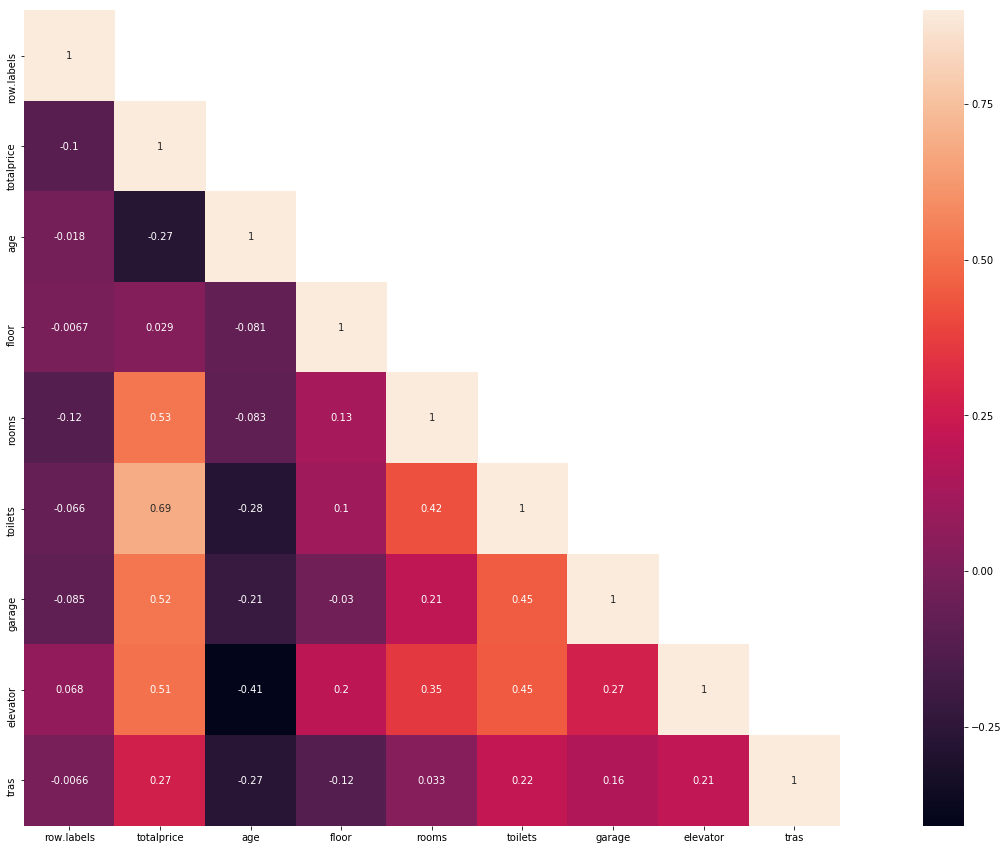

In [175]:
#create correlation with hitmap

#from this correlation, we know the value percentages of the correlation(1 or -1). The bigger value, so the correlation has big value too.
#weather has big correlation with the lattitude (-0,78). 

#create correlation
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(30,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Mari kita fokus terhadap variabel totalprice terhadap variabel lain. Karena totalprice akan saya gunakan untuk melakukan model
Korelasi paling besar terhadap totalprice ialah toilets dan rooms, sementara korelasi paling kecil ialah floor sehingga mungkin kita bisa hapus floor sebagai variabel untuk melakukan regresi

## 4. Variable Selection: Choose the variable and its reason.

In [179]:
y = df['totalprice']
x = df.drop(['totalprice','area','row.labels','floor'],axis=1)

x = pd.get_dummies(x)
x.head()

,age,rooms,toilets,garage,elevator,tras,zone_Z11,zone_Z21,zone_Z31,zone_Z32,...,conservation_2B,conservation_3A,streetcategory_S2,streetcategory_S3,streetcategory_S4,streetcategory_S5,heating_1A,heating_3A,heating_3B,heating_4A
0,33,5,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5,5,2,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,14,5,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,41,4,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,22,7,2,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


## 5. Modelling: Create models using Regression

In [180]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [181]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

In [182]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)

In [183]:
rmse = mean_squared_error(y_test,y_pred)

In [184]:
r2 = r2_score(y_test,y_pred)

In [185]:
cv = rmse/df['totalprice'].mean()

In [186]:
print('root mean squared error: ',rmse)
print('r2 score: ',r2)
print('coofisien Variance: ',cv)

root mean squared error:  1136469987.352437
r2 score:  0.8046459371267447
coofisien Variance:  4048.1008001746604


# Kesimpulan